In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

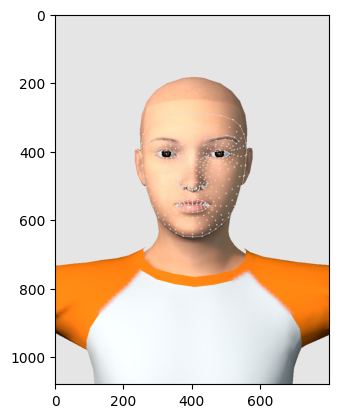

In [3]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    refine_landmarks=True,
    static_image_mode=True,
    max_num_faces=1,
)

mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

image = cv2.imread("./dataset/train/img/0.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = face_mesh.process(image)

for single_face_landmarks in results.multi_face_landmarks:
    mp_drawing.draw_landmarks(
        image=image,
        landmark_list=single_face_landmarks,
        connections=mp_face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=drawing_spec,
    )
    
plt.imshow(image)

In [8]:
height, width, _ = image.shape

for single_face_landmark in results.multi_face_landmarks:
    coordinates = single_face_landmarks.landmark[0]
    x = coordinates.x 
    y = coordinates.y
    z = coordinates.z

print(x, y, z)2

0.5023714900016785 0.5041713118553162 -0.03793500363826752


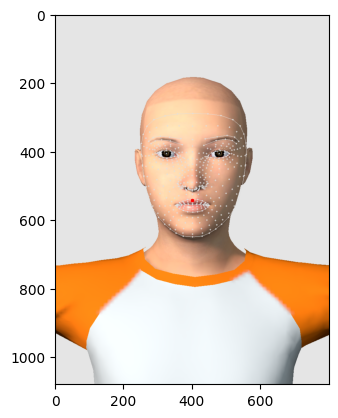

In [7]:
cv2.circle(image, (int(x), int(y)), 3, (255, 0, 0), -1)
plt.imshow(image)

In [74]:
for i in range(100):
    # 이미지 읽기
    image = cv2.imread("./dataset/train/img/%s.png"%i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 얼굴 검출
    results = face_mesh.process(image)

    # Face Mesh 그리기
    for single_face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=single_face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=drawing_spec,
            connection_drawing_spec=drawing_spec,
        )
        
    globals()['face_mesh'+str(i)] = np.zeros((468,3))
    
    height, width, _ = image.shape
    
    for simgle_face_landmarks in results.multi_face_landmarks:
        for j in range(468):
            coordinates = simgle_face_landmarks.landmark[j]
            globals()['face_mesh'+str(i)][j][0] = coordinates.x * width
            globals()['face_mesh'+str(i)][j][1] = coordinates.y * height
            globals()['face_mesh'+str(i)][j][2] = coordinates.z

    globals()['face_mesh'+str(i)] = pd.DataFrame(globals()['face_mesh'+str(i)])

In [77]:
for i in range(100):
    globals()['face_mesh'+str(i)].to_csv('./facemesh(denom)/train(denom)/%s.csv'%i,index=False)

In [78]:
for i in range(100):
    # 이미지 읽기
    image = cv2.imread("./dataset/test/img/%s.png"%i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 얼굴 검출
    results = face_mesh.process(image)

    # Face Mesh 그리기
    for single_face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=single_face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=drawing_spec,
            connection_drawing_spec=drawing_spec,
        )
        
    globals()['face_mesh2'+str(i)] = np.zeros((468,3))
    
    height, width, _ = image.shape
    
    for simgle_face_landmarks in results.multi_face_landmarks:
        for j in range(468):
            coordinates = simgle_face_landmarks.landmark[j]
            globals()['face_mesh2'+str(i)][j][0] = coordinates.x * width
            globals()['face_mesh2'+str(i)][j][1] = coordinates.y * height
            globals()['face_mesh2'+str(i)][j][2] = coordinates.z

    globals()['face_mesh2'+str(i)] = pd.DataFrame(globals()['face_mesh2'+str(i)])
    
    globals()['face_mesh2'+str(i)].to_csv('./facemesh(denom)/test(denom)/%s.csv'%i,index=False)